<a href="https://colab.research.google.com/github/PPM5658/IntelliVision-Real-Time-Object-Memory-Q-A-System/blob/main/Real_Time_Emotion_Recognition_and_AI_Mood_Uplifter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
import os
msambare_fer2013_path = kagglehub.dataset_download('msambare/fer2013')

print('Data source import complete.',msambare_fer2013_path)

msambare_fer2013_path

Using Colab cache for faster access to the 'fer2013' dataset.
Data source import complete. /kaggle/input/fer2013


'/kaggle/input/fer2013'

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install --ignore-installed blinker

  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)


In [ ]:
!pip install -r "/content/drive/MyDrive/Real-Time-Emotion-Recognition-and-AI-Mood-Uplifter/requir.txt"

INFO: pip is looking at multiple versions of mediapipe to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 156.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 143.2 MB/s 

In [2]:
from google.colab import files
files.upload()  # Upload kaggle.json when prompted

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pavan1304","key":"d9e8e0870a8c91925f9401ba972e06f7"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
  0% 0.00/60.3M [00:00<?, ?B/s]
100% 60.3M/60.3M [00:00<00:00, 1.80GB/s]


In [5]:
!unzip -q fer2013.zip -d /content/dataset/

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# ===============================================================
# 🚀 MobileNetV2 Transfer Learning for FER-2013
# ===============================================================
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os


In [7]:
train_dir = '/content/dataset/train'
val_dir   = '/content/dataset/test'

# we use RGB here (MobileNet expects 3 channels)
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True
).flow_from_directory(
    train_dir,
    target_size=(96,96),
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical'
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_dir,
    target_size=(96,96),
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [8]:
base = MobileNetV2(weights='imagenet', include_top=False,
                   input_tensor=Input(shape=(96,96,3)))

# freeze first ~90 % of layers (fine-tune later)
for layer in base.layers[:-20]:
    layer.trainable = False

x = GlobalAveragePooling2D()(base.output)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(7, activation='softmax')(x)

model = Model(inputs=base.input, outputs=outputs)
model.summary()

/tmp/ipython-input-1268258266.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = MobileNetV2(weights='imagenet', include_top=False,


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 48, 48,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 48, 48,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 48, 48,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 48, 48,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 48, 48,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 48, 48,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 48, 48,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 48, 48,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 49, 49,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 24, 24,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 24, 24,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 24, 24,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 24, 24,    │      2,304 │ block_1_depthwis

 Total params: 2,587,719 (9.87 MB)

 Trainable params: 1,535,815 (5.86 MB)

 Non-trainable params: 1,051,904 (4.01 MB)

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1),
    ModelCheckpoint('best_mobilenetv2_fer.keras', save_best_only=True)
]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=60,
    callbacks=callbacks
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
449/449 ━━━━━━━━━━━━━━━━━━━━ 132s 241ms/step - accuracy: 0.3558 - loss: 1.7220 - val_accuracy: 0.3288 - val_loss: 3.4226 - learning_rate: 0.0010
Epoch 2/60
449/449 ━━━━━━━━━━━━━━━━━━━━ 81s 180ms/step - accuracy: 0.4548 - loss: 1.4304 - val_accuracy: 0.4461 - val_loss: 1.8952 - learning_rate: 0.0010
Epoch 3/60
449/449 ━━━━━━━━━━━━━━━━━━━━ 81s 179ms/step - accuracy: 0.4775 - loss: 1.3915 - val_accuracy: 0.4216 - val_loss: 1.9101 - learning_rate: 0.0010
Epoch 4/60
449/449 ━━━━━━━━━━━━━━━━━━━━ 80s 177ms/step - accuracy: 0.4924 - loss: 1.3484 - val_accuracy: 0.4337 - val_loss: 2.3937 - learning_rate: 0.0010
Epoch 5/60
449/449 ━━━━━━━━━━━━━━━━━━━━ 80s 177ms/step - accuracy: 0.5031 - loss: 1.3263 - val_accuracy: 0.4851 - val_loss: 1.4553 - learning_rate: 0.0010
Epoch 6/60
449/449 ━━━━━━━━━━━━━━━━━━━━ 79s 175ms/step - accuracy: 0.5118 - loss: 1.2923 - val_accuracy: 0.4567 - val_loss: 1.6781 - learning_rate: 0.0010
Epoch 7/60
449/449 ━━━━━━━━━━━━━━━━━━━━ 80s 177ms/step - accuracy: 0.

In [12]:
for layer in model.layers:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 163s 259ms/step - accuracy: 0.4385 - loss: 1.5552 - val_accuracy: 0.5284 - val_loss: 1.3393 - learning_rate: 1.0000e-05
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 88s 196ms/step - accuracy: 0.4894 - loss: 1.3624 - val_accuracy: 0.5196 - val_loss: 1.3532 - learning_rate: 1.0000e-05
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 89s 198ms/step - accuracy: 0.5107 - loss: 1.2962 - val_accuracy: 0.5153 - val_loss: 1.3423 - learning_rate: 1.0000e-05
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 88s 196ms/step - accuracy: 0.5258 - loss: 1.2474 - val_accuracy: 0.5170 - val_loss: 1.3357 - learning_rate: 1.0000e-05
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 88s 196ms/step - accuracy: 0.5392 - loss: 1.2205 - val_accuracy: 0.5213 - val_loss: 1.2956 - learning_rate: 1.0000e-05
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 88s 197ms/step - accuracy: 0.5518 - loss: 1.1969 - val_accuracy: 0.5288 - val_loss: 1.2834 - learning_rate: 1.0000e-05
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 86s 1

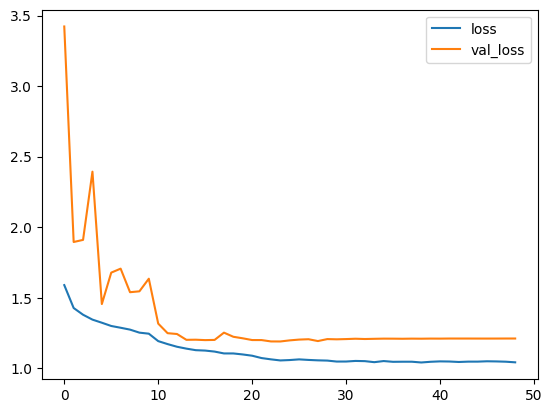

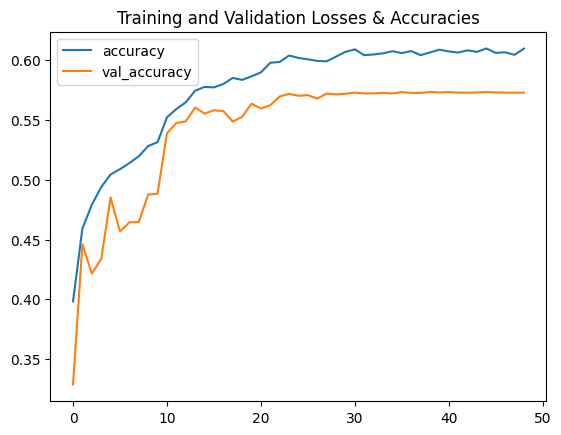

In [14]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.title("Training and Validation Losses & Accuracies")
plt.show()

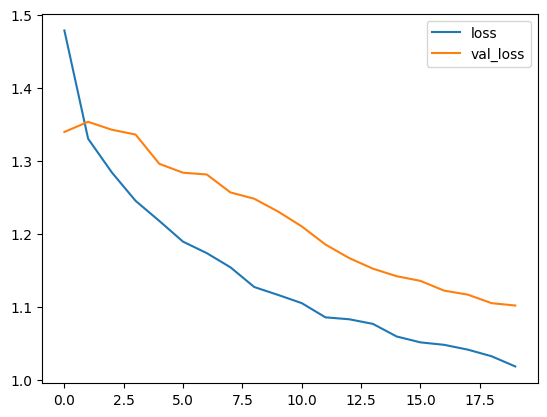

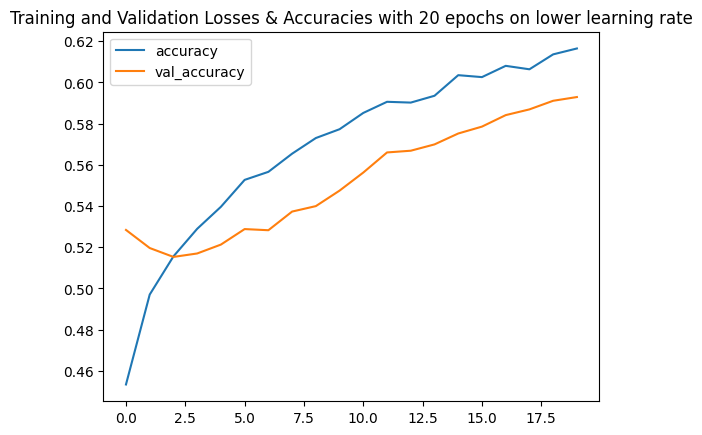

In [15]:
history_df = pd.DataFrame(history_fine.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.title("Training and Validation Losses & Accuracies with 20 epochs on lower learning rate")
plt.show()

In [19]:
model

<Functional name=functional, built=True>

In [20]:
model.save('/content/drive/MyDrive/Real-Time-Emotion-Recognition-and-AI-Mood-Uplifter/model/best_mobilenetv2_fer.keras')

In [1]:
import cv2 as cv
import mediapipe as mp
import time

class facereg:
    def __init__(self, minDetectioncon=0.5):
        self.minDetectioncon = minDetectioncon
        self.mp_face_detection = mp.solutions.face_detection
        self.mpdraw = mp.solutions.drawing_utils
        self.face_detection = self.mp_face_detection.FaceDetection(self.minDetectioncon)

    def detect_face(self, frame):
        imgRGB = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        self.results = self.face_detection.process(imgRGB)
        bbox = None
        if self.results.detections:
            for id, detect in enumerate(self.results.detections):
                bboxc = detect.location_data.relative_bounding_box
                ih, iw, ic = frame.shape
                bbox = int(bboxc.xmin * iw), int(bboxc.ymin * ih), \
                       int(bboxc.width * iw), int(bboxc.height * ih)
                cv.putText(frame, f'{int(detect.score[0]*100)} % ', (bbox[0],bbox[1]-20), cv.FONT_HERSHEY_PLAIN, 2, (0, 255, 120), 2)
        return frame, bbox


/usr/local/lib/python3.12/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.7.2 is installed, but it is not compatible with the installed jaxlib version 0.7.1, so it will not be used.
  warnings.warn(


In [3]:
from tensorflow.keras.models import load_model


emotion_model = load_model('/content/drive/MyDrive/Real-Time-Emotion-Recognition-and-AI-Mood-Uplifter/model/best_mobilenetv2_fer.keras')  # update path if needed

emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

In [6]:
def preprocess_face(frame, bbox):
    """Crop and preprocess face for model prediction."""
    x, y, w, h = bbox
    face = frame[y:y+h, x:x+w]
    if face.size == 0:
        return None
    face = cv.cvtColor(face, cv.COLOR_BGR2RGB)
    face = cv.resize(face, (96, 96))   # MobileNetV2 input size
    face = np.expand_dims(face, axis=0)
    face = face / 255.0
    return face

detector = facereg(minDetectioncon=0.6)
cap = cv.VideoCapture()

pTime = 0
while True:
    success, frame = cap.read()
    if not success:
        break

    frame, bbox = detector.detect_face(frame)
    if bbox:
        face_input = preprocess_face(frame, bbox)
        if face_input is not None:
            preds = emotion_model.predict(face_input)
            emotion_idx = np.argmax(preds)
            confidence = np.max(preds)

            text = f"{emotion_labels[emotion_idx]} ({confidence*100:.1f}%)"
            x, y, w, h = bbox
            cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv.putText(frame, text, (x, y-10),
                       cv.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)

    # show FPS
    cTime = time.time()
    fps = 1 / (cTime - pTime) if pTime != 0 else 0
    pTime = cTime
    cv.putText(frame, f'FPS: {int(fps)}', (10, 30),
               cv.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    cv.imshow('Emotion Recognition', frame)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

In [21]:
import google.generativeai as genai
from google.colab import userdata
api_key=userdata.get('gemini')
# Initialize Gemini with your API key (add it to your Colab secrets or config.py)

genai.configure(api_key=api_key)

def generate_mood_message(emotion_label):
    """Generate short motivational message based on emotion."""
    prompt = f"Write one short motivational message for someone who is feeling {emotion_label.lower()}. Keep it friendly and under 10 words."
    try:
        response = genai.GenerativeModel("gemini-1.5-flash").generate_content(prompt)
        return response.text.strip()
    except Exception as e:
        print("Gemini Error:", e)
        return "You're doing great today!"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Gemini Error: 404 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: models/gemini-1.5-flash is not found for API version v1beta, or is not supported for generateContent. Call ListModels to see the list of available models and their supported methods.


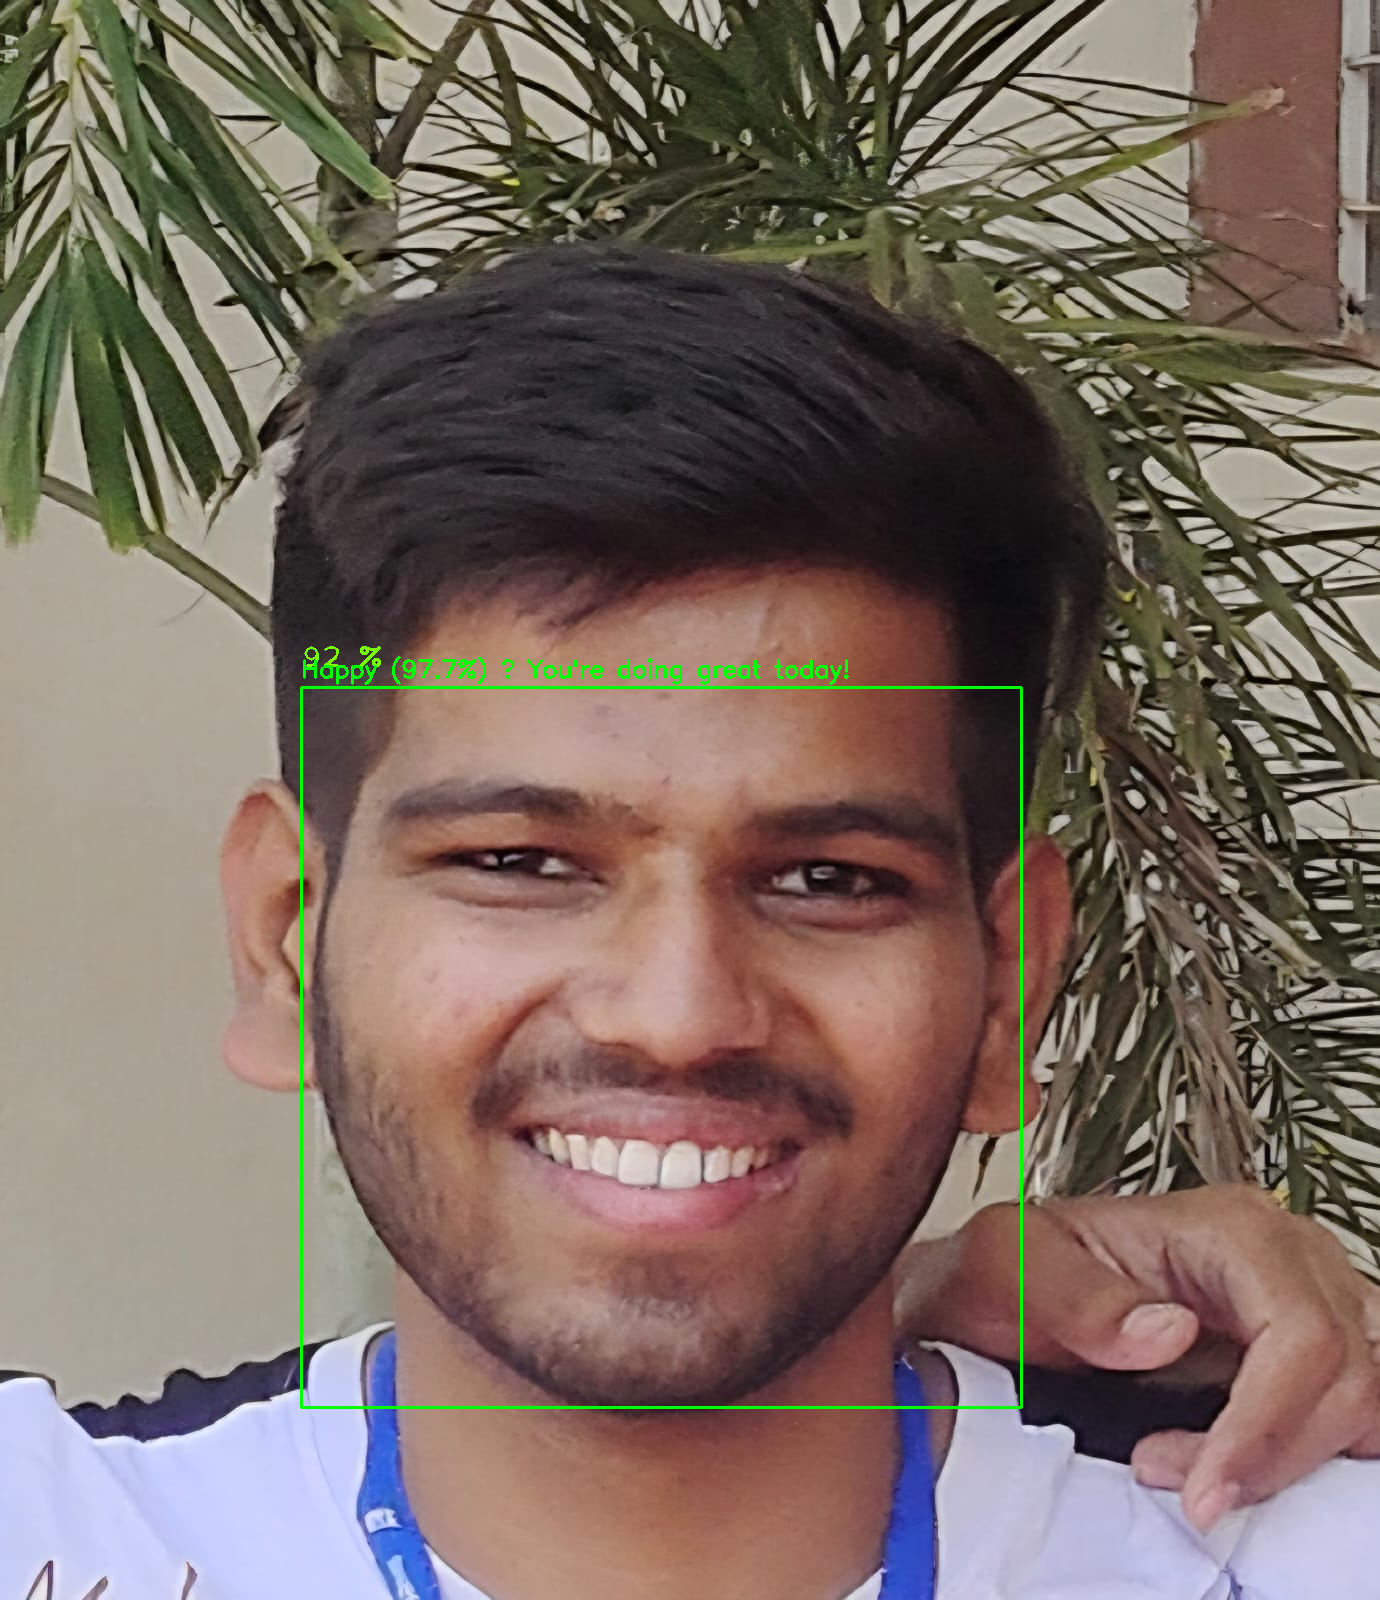

You're doing great today!


In [22]:
# === Load your test image ===
img = cv.imread('/content/drive/MyDrive/Img_Read/Testing_face/WhatsApp Image 2025-09-24 at 17.07.21_c694cb67.jpg')

# Initialize face detector
detector = facereg(minDetectioncon=0.6)

# Detect face and bounding box
frame, bbox = detector.detect_face(img)
face_input = preprocess_face(frame, bbox)

if face_input is not None:
    preds = emotion_model.predict(face_input)
    emotion_idx = np.argmax(preds)
    confidence = np.max(preds)
    emotion_message=generate_mood_message(emotion_labels[emotion_idx])
    text = f"{emotion_labels[emotion_idx]} ({confidence*100:.1f}%) \n {emotion_message}"

    x, y, w, h = bbox
    cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv.putText(frame, text, (x, y-10),
               cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

else:
    cv.putText(frame, "No face detected", (30, 50),
               cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

cv2_imshow(frame)
cv.waitKey(0)
cv.destroyAllWindows()
print(emotion_message)